In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

In [2]:
obj.rna <- readRDS("../../../snRNA/from_rico/integrated_snrnaseq/integrated_rnasamples_ann.rds")

In [3]:
obj.rna

An object of class Seurat 
29126 features across 191795 samples within 1 assay 
Active assay: RNA (29126 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap_harmony

In [4]:
unique(obj.rna$cell_type)

[1] "Fib"      "CM"       "Endo"     "Myeloid"  "Neuronal" "PC"      
 [7] "Mast"     "Lymphoid" "prolif"   "vSMCs"    "Adipo"

In [5]:
## subset all Neuronal cells
obj.rna <- subset(obj.rna, cell_type == "Neuronal")

In [6]:
obj.rna

An object of class Seurat 
29126 features across 2436 samples within 1 assay 
Active assay: RNA (29126 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap_harmony

In [7]:
head(obj.rna@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,doublet_score,doublet,dissociation_s1,opt_clust,patient,batch,opt_clust_integrated,cell_type
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACGCTCAGAACTTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,3123,1944,0.4162664,0.0002459475,singlet,0.16321697,11,P1,A,17,Neuronal
AAAGGATTCCATAGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1987,1354,0.3019628,0.0426175110,singlet,0.06248388,11,P1,A,17,Neuronal
AAAGGATTCGTCGATA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1486,1080,0.3364738,0.0001614968,singlet,0.03752886,11,P1,A,17,Neuronal
AACGGGAGTTTGTTGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1405,997,0.2846975,0.0001716715,singlet,0.04390119,11,P1,A,17,Neuronal
AAGCCATGTTTAAGGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1328,1014,0.2259036,0.0003361728,singlet,0.02887751,11,P1,A,17,Neuronal
AAGTACCCAATGCAAA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1344,903,0.3720238,0.0003106603,singlet,0.08233527,11,P1,A,17,Neuronal


In [8]:
## add annotation for samples
df_sample_annotation <- read.csv("../../../snRNA/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK158,control,P1,control_P1,group_1
2,CK162,FZ/GT,P4,FZ/GT_P4,group_3
3,CK165,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK163,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK161,IZ,P3,IZ_P3,group_2
6,CK160,RZ/BZ,P3,RZ/BZ_P3,group_1


In [9]:
obj.rna@meta.data$region <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_region)
obj.rna@meta.data$patient <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient)
obj.rna@meta.data$patient_region_id <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_region)
obj.rna@meta.data$patient_group <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_group)

In [10]:
df_cell_count <- as.data.frame(obj.rna@meta.data) %>%
    group_by(orig.ident) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

df_cell_count

orig.ident,count
<chr>,<int>
CK360,299
CK356,261
CK358,206
CK164,147
CK158,142
CK163,140
CK357,125
CK160,118
CK359,108


In [18]:
# we remove samples with less than 50 cells
df_cell_count <- subset(df_cell_count, count > 50)
obj.rna.sub <- subset(obj.rna, orig.ident %in% df_cell_count$orig.ident)

obj.rna.sub

An object of class Seurat 
29126 features across 2172 samples within 1 assay 
Active assay: RNA (29126 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap_harmony

In [12]:
obj.rna.sub <- obj.rna.sub %>% 
        NormalizeData() %>%
        FindVariableFeatures() %>%
        ScaleData() %>%
        RunPCA(verbose = FALSE) %>%
        RunUMAP(dims = 1:30)

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:28:10 UMAP embedding parameters a = 0.9922 b = 1.112

15:28:10 Read 2268 rows and found 30 numeric columns

15:28:10 Using Annoy for neighbor search, n_neighbors = 30

15:28:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:28:10 Writing NN index file to temp file /tmp/Rtmp0vmiFk/file3c21d72c45188

15:28:10 Searching Annoy index using 1 thread, search_k = 3000

15:28:11 Annoy recall = 100%

15:28:14 Commencing smooth kNN distance calibration using

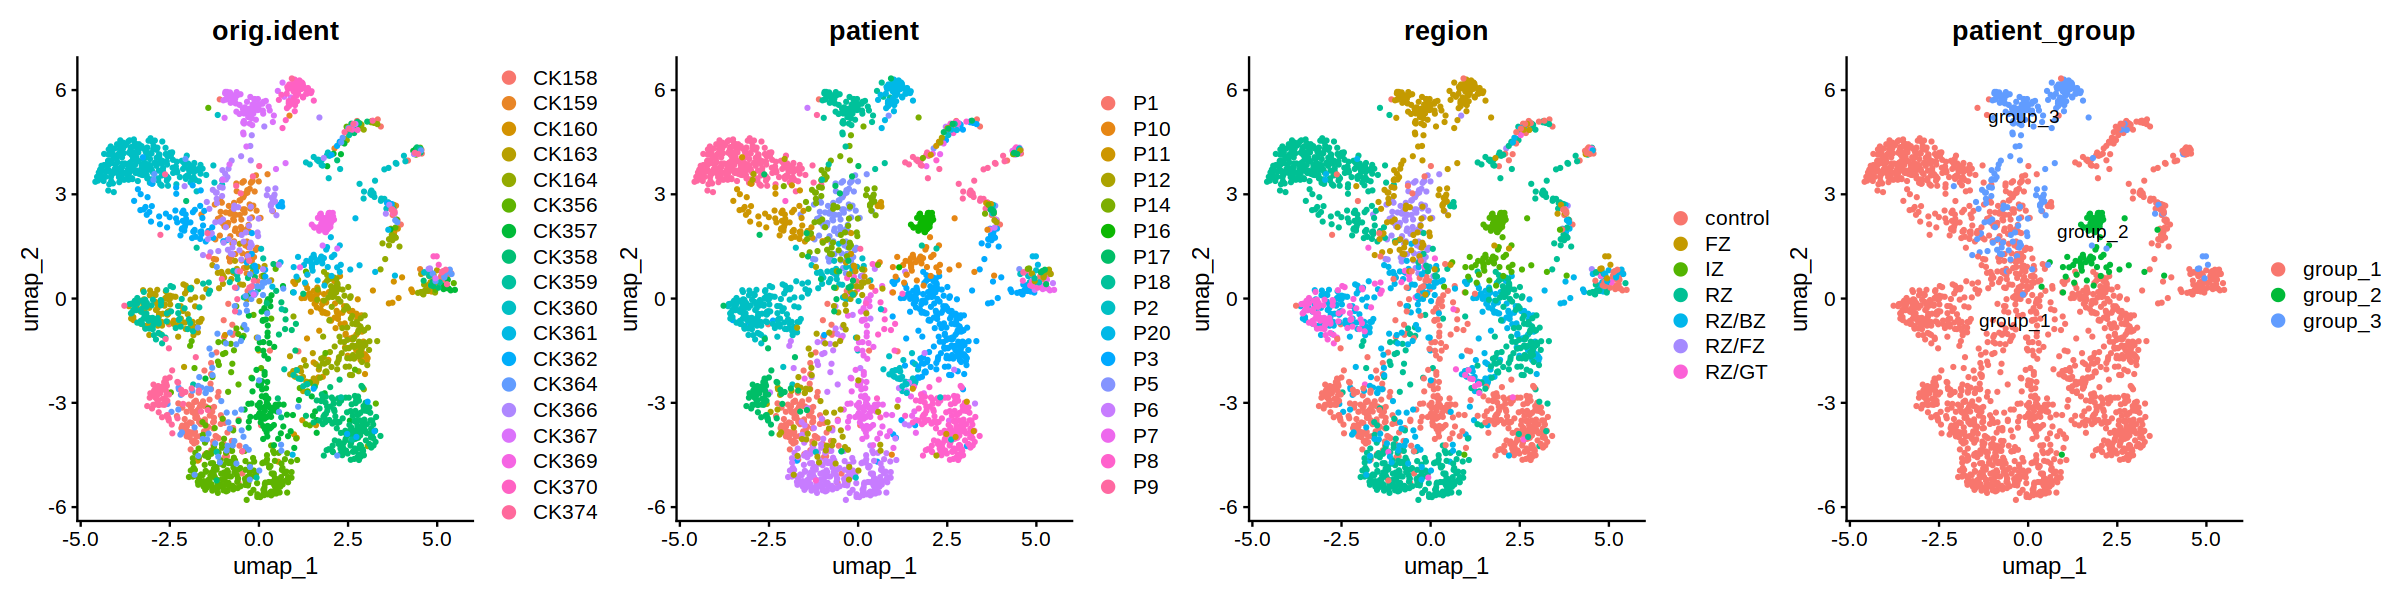

In [13]:
options(repr.plot.height = 5, repr.plot.width = 20)

p1 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient")
p3 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "region")
p4 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient_group", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 1)

Harmony 1/30

Harmony 2/30

Harmony 3/30

Harmony 4/30

Harmony 5/30

Harmony 6/30

Harmony 7/30

Harmony 8/30

Harmony 9/30

Harmony 10/30

Harmony 11/30

Harmony 12/30

Harmony 13/30

Harmony converged after 13 iterations



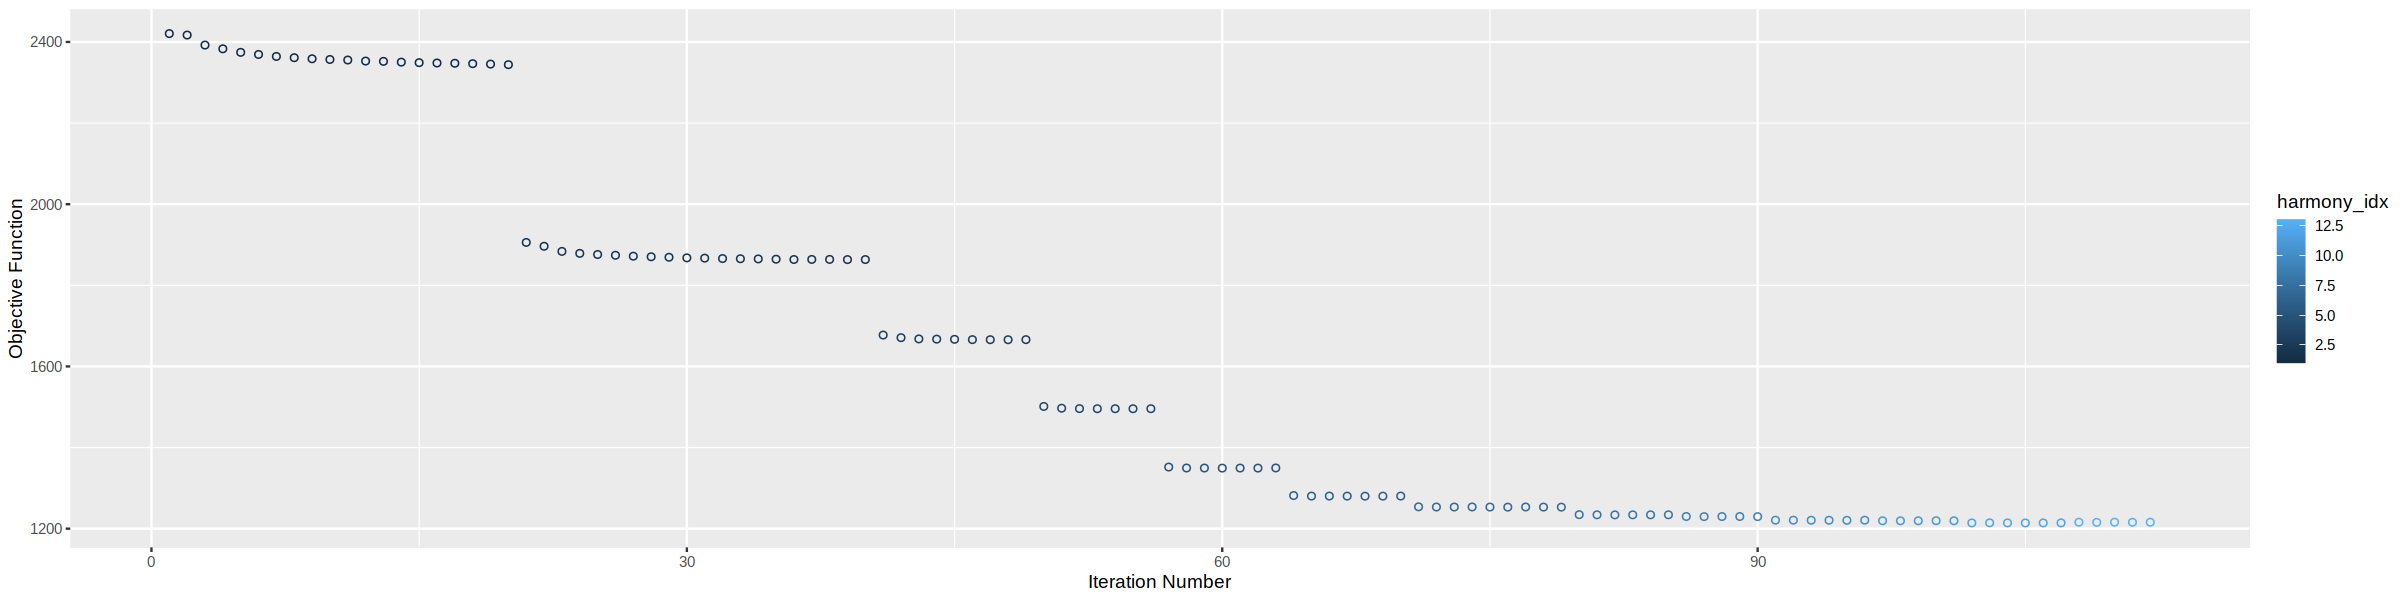

In [14]:
obj.rna.sub <- RunHarmony(obj.rna.sub, 
                      group.by.vars = c("orig.ident", "patient", "region"),
                     reduction = "pca", 
                      max.iter.harmony = 30, 
                      dims.use = 1:30,
                     project.dim = FALSE,
                     plot_convergence = TRUE)


obj.rna.sub <- RunUMAP(obj.rna.sub, 
               dims = 1:30, 
               reduction = 'harmony',
               reduction.name = "umap_harmony",
               reduction.ke = 'umapharmony_',
              verbose = FALSE,
                   min.dist = 0.4)

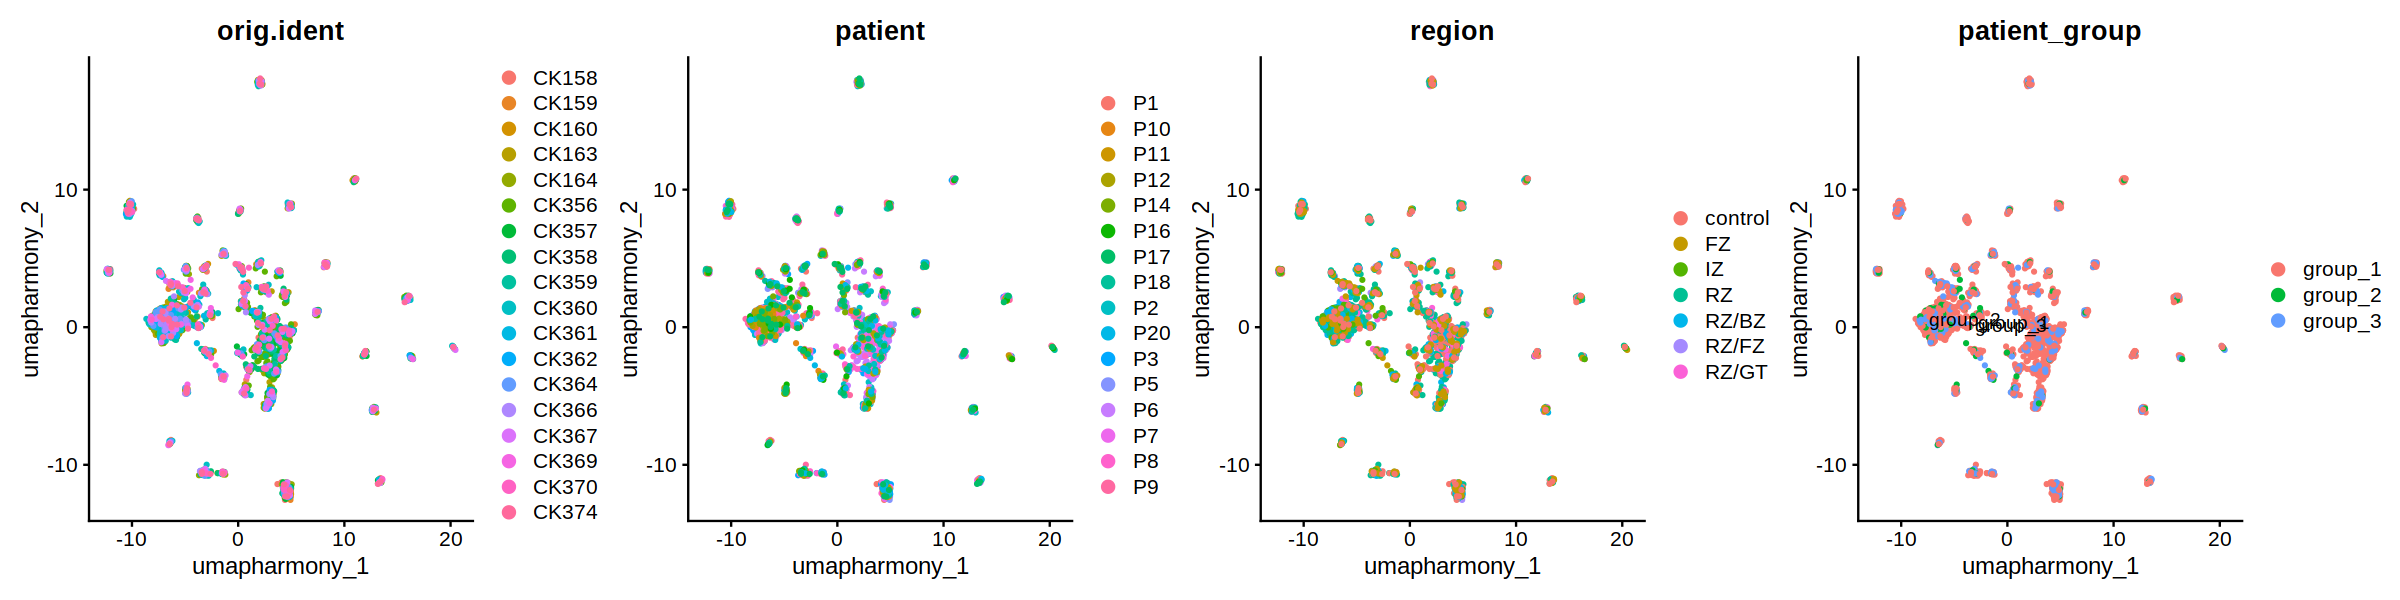

In [15]:
options(repr.plot.height = 5, repr.plot.width = 20)

p1 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "orig.ident")
p2 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "patient")
p3 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "region")
p4 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "patient_group", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 1)

In [16]:
obj.rna.sub <- FindNeighbors(obj.rna.sub, reduction = "harmony", dims = 1:30)
obj.rna.sub <- FindClusters(obj.rna.sub, resolution = 0.1, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



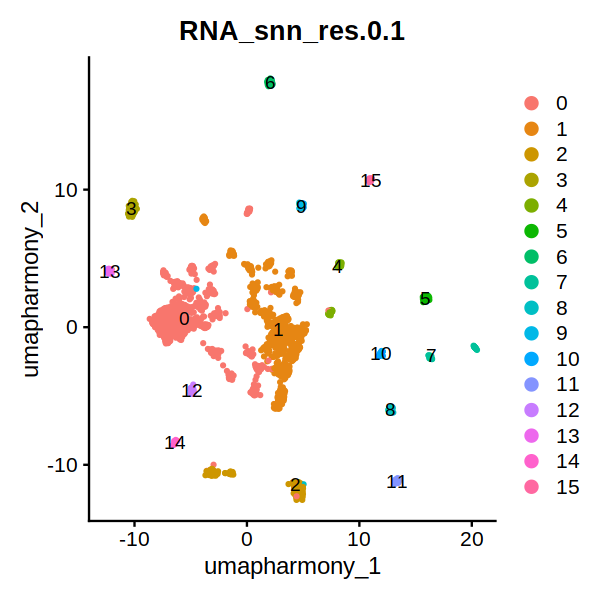

In [17]:
options(repr.plot.height = 5, repr.plot.width = 5)
DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "RNA_snn_res.0.1", label = TRUE)

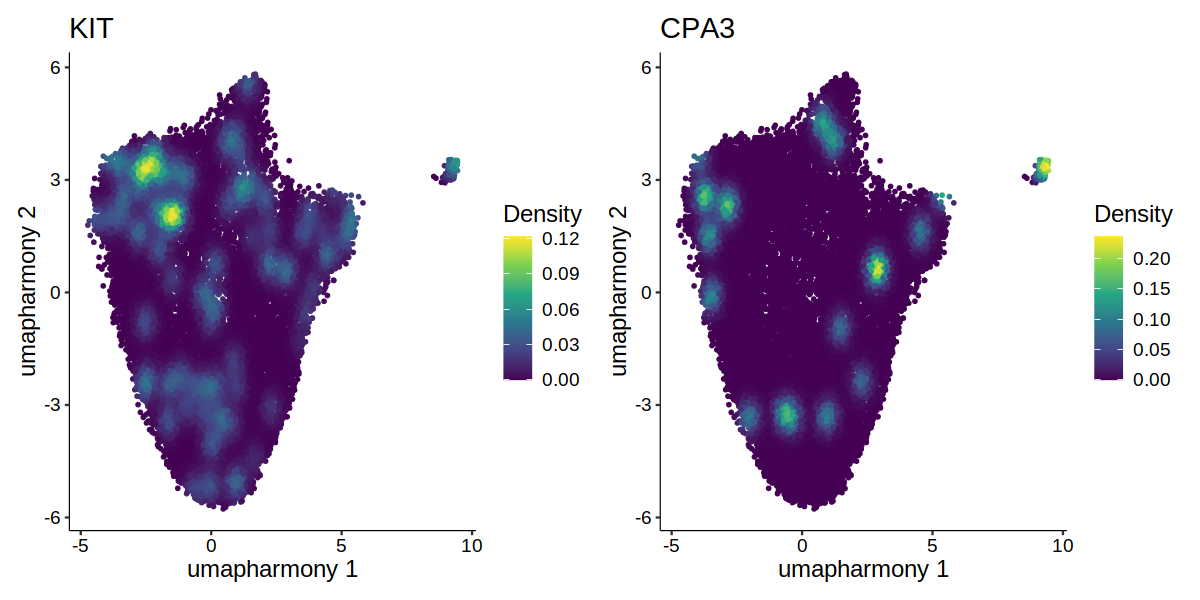

In [21]:
# suppressMessages(library(Nebulosa))

# options(repr.plot.height = 5, repr.plot.width = 10)

# p1 <- plot_density(obj.rna.sub, features="KIT", reduction="umap_harmony")
# p2 <- plot_density(obj.rna.sub, features="CPA3", reduction="umap_harmony")

# patchwork::wrap_plots(list(p1, p2), nrow = 1)

In [ ]:
if(!dir.exists("../data/snRNA")){
    dir.create("../data/snRNA")
}

In [ ]:
# find marker
Idents(obj.rna.sub) <- "RNA_snn_res.0.1"

all.markers <- FindAllMarkers(obj.rna.sub, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

# Dot plots - the size of the dot corresponds to the percentage of cells expressing the
# feature in each cluster. The color represents the average expression level
options(repr.plot.height = 4, repr.plot.width = 15)
DotPlot(obj.rna.sub, features = unique(df$gene)) + RotatedAxis()

In [ ]:
markerList <- split(all.markers, all.markers$cluster)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}

WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "../data/snRNA/MarkerGenes.xlsx",
                   SheetNames = names(markerList))

saveRDS(all.markers, "../data/snRNA/MarkerGenes.rds")

In [ ]:
saveRDS(obj.rna.sub, "../data/snRNA/snRNA.rds")

In [ ]:
sessionInfo()